# Wine Quality Prediction


![](https://cf.ltkcdn.net/wine/images/orig/200786-1697x1131-red-wine.jpg)

###### Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import plotly.express as px
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

##### Importing Dataset

In [2]:
wine_df = pd.read_csv('Wine-Quality_Data.csv')

In [3]:
wine_df.shape

(1599, 12)

Rows - 1599, Columns - 12

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine_df['quality'].value_counts().sort_values() 

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

In [7]:
wine_df['fixed acidity'].value_counts().sort_values() 

5.5      1
12.1     1
4.9      1
15.9     1
4.6      1
        ..
7.0     50
7.5     52
7.8     53
7.1     57
7.2     67
Name: fixed acidity, Length: 96, dtype: int64

In [8]:
wine_df['volatile acidity'].value_counts().sort_values() 

1.090     1
0.955     1
1.005     1
0.295     1
1.010     1
         ..
0.360    38
0.590    39
0.430    43
0.500    46
0.600    47
Name: volatile acidity, Length: 143, dtype: int64

In [9]:
wine_df['citric acid'].value_counts().sort_values() 

0.78      1
0.71      1
0.79      1
1.00      1
0.62      1
       ... 
0.26     38
0.02     50
0.24     51
0.49     68
0.00    132
Name: citric acid, Length: 80, dtype: int64

In [10]:
wine_df['residual sugar'].value_counts().sort_values() 

13.9      1
8.9       1
12.9      1
4.7       1
5.4       1
       ... 
1.9     117
2.1     128
1.8     129
2.2     131
2.0     156
Name: residual sugar, Length: 91, dtype: int64

In [11]:
wine_df['chlorides'].value_counts().sort_values() 

0.230     1
0.611     1
0.034     1
0.360     1
0.145     1
         ..
0.084    49
0.078    51
0.076    51
0.074    55
0.080    66
Name: chlorides, Length: 153, dtype: int64

In [12]:
wine_df['free sulfur dioxide'].value_counts().sort_values() 

66.0      1
53.0      1
72.0      1
57.0      1
47.0      1
40.5      1
2.0       1
46.0      1
54.0      1
5.5       1
37.5      2
50.0      2
55.0      2
68.0      2
45.0      3
43.0      3
1.0       3
37.0      3
42.0      3
52.0      3
51.0      4
48.0      4
39.0      5
40.0      6
41.0      7
38.0      9
33.0     11
36.0     11
35.0     15
30.0     16
34.0     18
31.0     20
32.0     22
22.0     22
28.0     23
29.0     23
25.0     24
27.0     29
20.0     30
23.0     32
26.0     32
24.0     34
19.0     39
21.0     41
4.0      41
18.0     46
3.0      49
14.0     50
8.0      56
13.0     57
11.0     59
17.0     60
16.0     61
9.0      62
7.0      71
12.0     75
15.0     78
10.0     79
5.0     104
6.0     138
Name: free sulfur dioxide, dtype: int64

In [13]:
wine_df['total sulfur dioxide'].value_counts().sort_values() 

165.0     1
140.0     1
160.0     1
289.0     1
278.0     1
         ..
23.0     34
18.0     35
15.0     35
24.0     36
28.0     43
Name: total sulfur dioxide, Length: 144, dtype: int64

In [14]:
wine_df['density'].value_counts().sort_values() 

0.99651     1
0.99292     1
0.99609     1
0.99699     1
1.00320     1
           ..
0.99620    28
0.99800    29
0.99760    35
0.99680    35
0.99720    36
Name: density, Length: 436, dtype: int64

In [15]:
wine_df['pH'].value_counts().sort_values() 

2.90     1
3.74     1
2.86     1
2.87     1
3.85     1
        ..
3.39    48
3.38    48
3.26    53
3.36    56
3.30    57
Name: pH, Length: 89, dtype: int64

In [16]:
wine_df['sulphates'].value_counts().sort_values() 

1.01     1
1.16     1
1.15     1
1.33     1
1.56     1
        ..
0.56    60
0.62    61
0.54    68
0.58    68
0.60    69
Name: sulphates, Length: 96, dtype: int64

In [17]:
wine_df['alcohol'].value_counts().sort_values() 

10.75      1
13.50      1
13.20      1
14.90      1
8.50       1
        ... 
10.00     67
9.20      72
9.80      78
9.40     103
9.50     139
Name: alcohol, Length: 65, dtype: int64

Checking for null values

In [18]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### Statistical Analysis

In [19]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


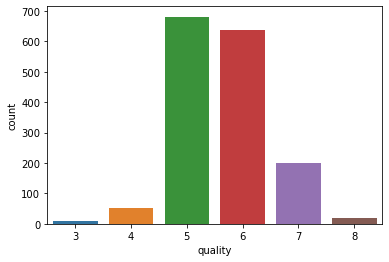

In [20]:
sb.countplot(x='quality',data = wine_df);

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

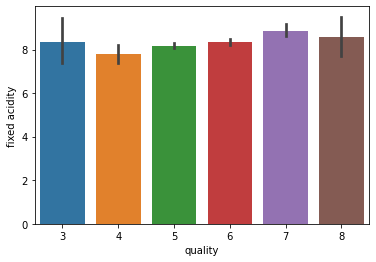

In [21]:
sb.barplot(x = 'quality', y = 'fixed acidity', data = wine_df)

The quality of wine cant be well defined by mapping with fixed acidity

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

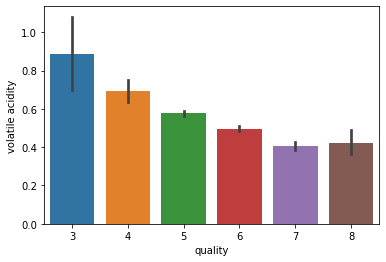

In [22]:
sb.barplot(x = 'quality', y = 'volatile acidity', data = wine_df)

If the volatile acidity is high, quality is low and vice versa. For the quality to be high volatile acidity shhould be around 0.5

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

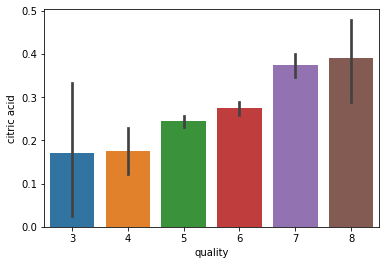

In [23]:
sb.barplot(x = 'quality', y = 'citric acid', data = wine_df)

If the citric acidity is high, quality is high and vice versa.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

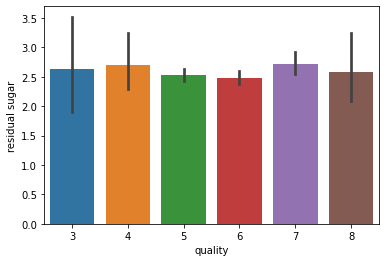

In [24]:
sb.barplot(x = 'quality', y = 'residual sugar', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

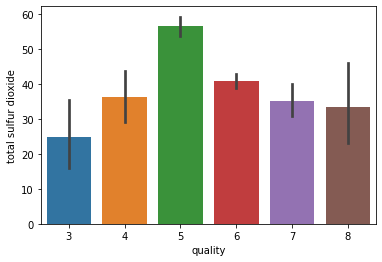

In [25]:
sb.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

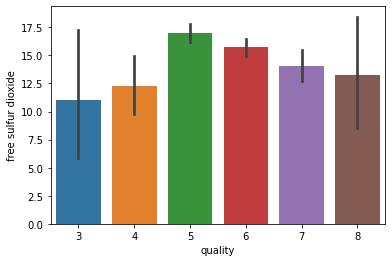

In [26]:
sb.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='density'>

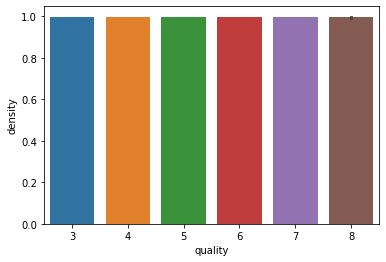

In [27]:
sb.barplot(x = 'quality', y = 'density', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

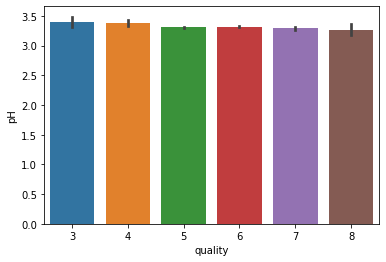

In [28]:
sb.barplot(x = 'quality', y = 'pH', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

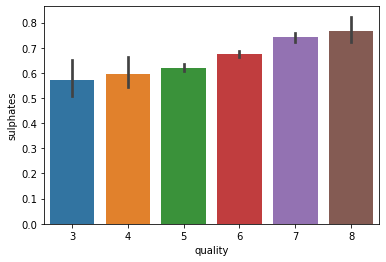

In [29]:
sb.barplot(x = 'quality', y = 'sulphates', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

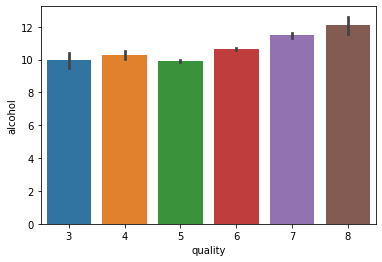

In [30]:
sb.barplot(x = 'quality', y = 'alcohol', data = wine_df)

Finding Correlation

In [31]:
correlation = wine_df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Plotting the correlation in a heat map

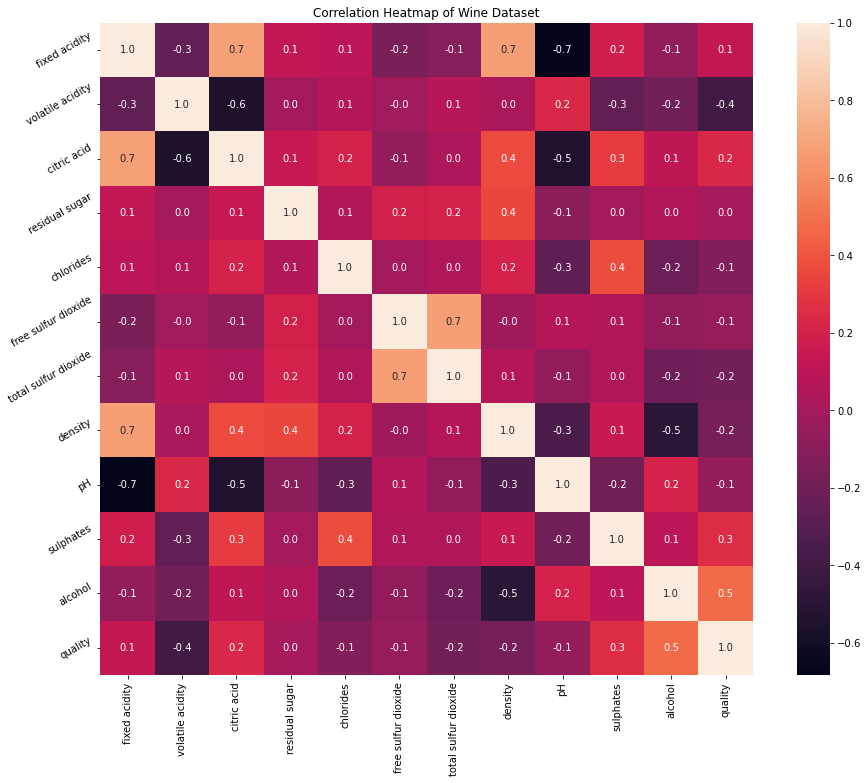

In [32]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Wine Dataset')
s = sb.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
s.set_yticklabels(s.get_yticklabels(), rotation=30)  
plt.show()

#### Spllitting the columns into feature and target columns

In [33]:
X = wine_df.drop('quality', axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [34]:
X.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

###### Changing the target column values into binary values

In [35]:
Y = wine_df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [36]:
Z = wine_df['quality']
Z

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

#### Splitting the dataset into train and test dataset

In [37]:
# Binary Target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)  #20% of original data will be test data, random state ->
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


### Model Training 1 - Decision Tree

In [38]:
# Training the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

##### Model Evaluation,                    Accuracy Score           

In [39]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy of the model with training data : ', train_data_accuracy)

Accuracy of the model with training data :  1.0


In [40]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy of the model with test data : ', test_data_accuracy)

Accuracy of the model with test data :  0.890625


###### Building a predictive system

In [41]:
a_np = np.asarray((8.4, 0.635, 0.36, 2, 0.089, 15, 55, 0.99745, 3.31, 0.57, 10.4))
a_np_reshape = a_np.reshape(1, -1)

prediction = model.predict(a_np_reshape)

In [42]:
if (prediction [0] == 1):
    print('Wine is of Good Quality')
else:
    print('Wine is of Not Good Quality')    

Wine is of Not Good Quality


### Model Training 2 - Random Forest

In [43]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy of the model with training data : ', train_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy of the model with test data : ', test_data_accuracy)

Accuracy of the model with training data :  1.0
Accuracy of the model with test data :  0.9125


In [44]:
a_np = np.asarray((8.4, 0.635, 0.36, 2, 0.089, 15, 55, 0.99745, 3.31, 0.57, 10.4))
a_np_reshape = a_np.reshape(1, -1)

prediction = model.predict(a_np_reshape)

if (prediction [0] == 1):
    print('Wine is of Good Quality')
else:
    print('Wine is of Not Good Quality')    

Wine is of Not Good Quality


### Model Training 3 - Logistic Regression

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy of the model with training data : ', train_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy of the model with test data : ', test_data_accuracy)

Accuracy of the model with training data :  0.8756841282251759
Accuracy of the model with test data :  0.884375


In [46]:
a_np = np.asarray((8.4, 0.635, 0.36, 2, 0.089, 15, 55, 0.99745, 3.31, 0.57, 10.4))
a_np_reshape = a_np.reshape(1, -1)

prediction = model.predict(a_np_reshape)

if (prediction [0] == 1):
    print('Wine is of Good Quality')
else:
    print('Wine is of Not Good Quality')    

Wine is of Not Good Quality


#### Comparing with the 3 models, accuracy of test data with Random Forest is 93% which is more than that of other two models
#### Thus we can select Random Forest Model is best to predict wine quality.